mean mean cog x = 0.15502333641052246
mean mean cog z = 0.19822663068771362
mean std cog x = 6.588670253753662
mean std cog z = 1.5877454280853271
(10000, 65)


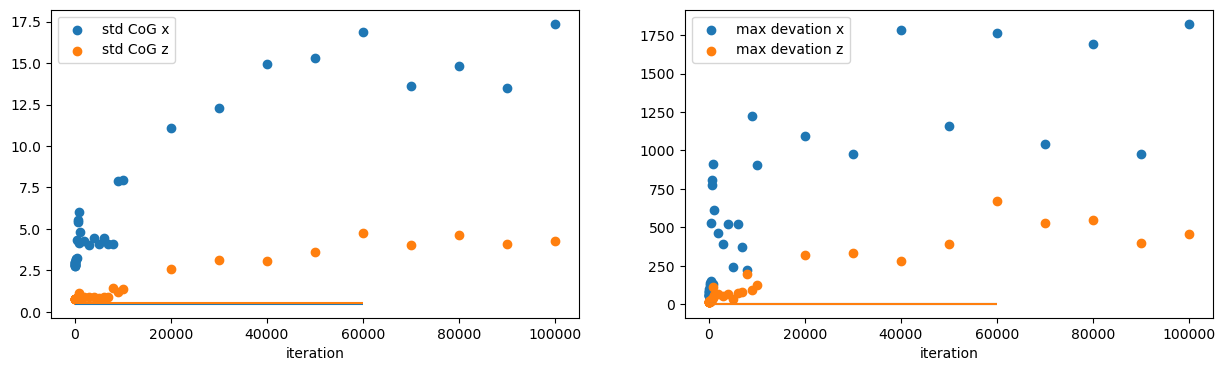

In [67]:
import os
import numpy as np
from matplotlib import pyplot as plt
output_dir = "/data/dust/user/dayhallh/CC2-out/"
prefix = "pureShowerflow_highGran_g40_p22_th90_ph90_en10-100_original_nb10_inputs36893488147419103231_dhist_try2_0"
files = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if prefix in f and f.endswith("npy")]
iteration = np.fromiter((int(f.split(prefix)[-1].split('_')[0]) for f in files), dtype=int)

cog_x = np.vstack([np.load(f)[:, 2] for f in files])
cog_z = np.vstack([np.load(f)[:, 3] for f in files])

mean_cog_x = np.mean(cog_x, axis=1)
print(f"mean mean cog x = {np.mean(mean_cog_x)}")
mean_cog_z = np.mean(cog_z, axis=1)
print(f"mean mean cog z = {np.mean(mean_cog_z)}")
std_cog_x = np.std(cog_x, axis=1)
print(f"mean std cog x = {np.mean(std_cog_x)}")
std_cog_z = np.std(cog_z, axis=1)
print(f"mean std cog z = {np.mean(std_cog_z)}")
centered_x = cog_x - np.mean(mean_cog_x)
centered_z = cog_z - np.mean(mean_cog_z)
max_x_devation = np.max(np.abs(centered_x), axis=1)
max_z_devation = np.max(np.abs(centered_z), axis=1)

loaded = np.load("/data/dust/user/dayhallh/data/ILCsoftEvents/highGran_g40_p22_th90_ph90_en10-100.hdf5stack_of_training_data.npy")
print(loaded.shape)
ds_cog_x = loaded[:, 2]
ds_cog_z = loaded[:, 3]
mean_ds_cog_x = np.mean(ds_cog_x)
mean_ds_cog_z = np.mean(ds_cog_z)
std_ds_cog_x = np.std(ds_cog_x)
std_ds_cog_z = np.std(ds_cog_z)
max_dev_ds_x = np.max(np.abs(ds_cog_x - mean_ds_cog_x))
max_dev_ds_z = np.max(np.abs(ds_cog_z - mean_ds_cog_z))
std_ds_cog_x, std_ds_cog_z, max_dev_ds_x, max_dev_ds_z

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
ax1.scatter(iteration, std_cog_x, label='std CoG x')
ax1.scatter(iteration, std_cog_z, label='std CoG z')
ax1.hlines(std_ds_cog_x, 0, 60_000, color='tab:blue')
ax1.hlines(std_ds_cog_z, 0, 60_000, color='tab:orange')

ax2.scatter(iteration, max_x_devation, label='max devation x')
ax2.scatter(iteration, max_z_devation, label='max devation z')
ax2.hlines(max_dev_ds_x, 0, 60_000, color='tab:blue')
ax2.hlines(max_dev_ds_z, 0, 60_000, color='tab:orange')

for ax in [ax1, ax2]:
    ax.legend()
    ax.set_xlabel('iteration')

/data/dust/user/dayhallh/CC2-out/pureShowerflow_highGran_g40_p22_th90_ph90_en10-100_original_nb10_inputs36893488147419103231_dhist_try2_0100000_2025-06-25_15-36.npy


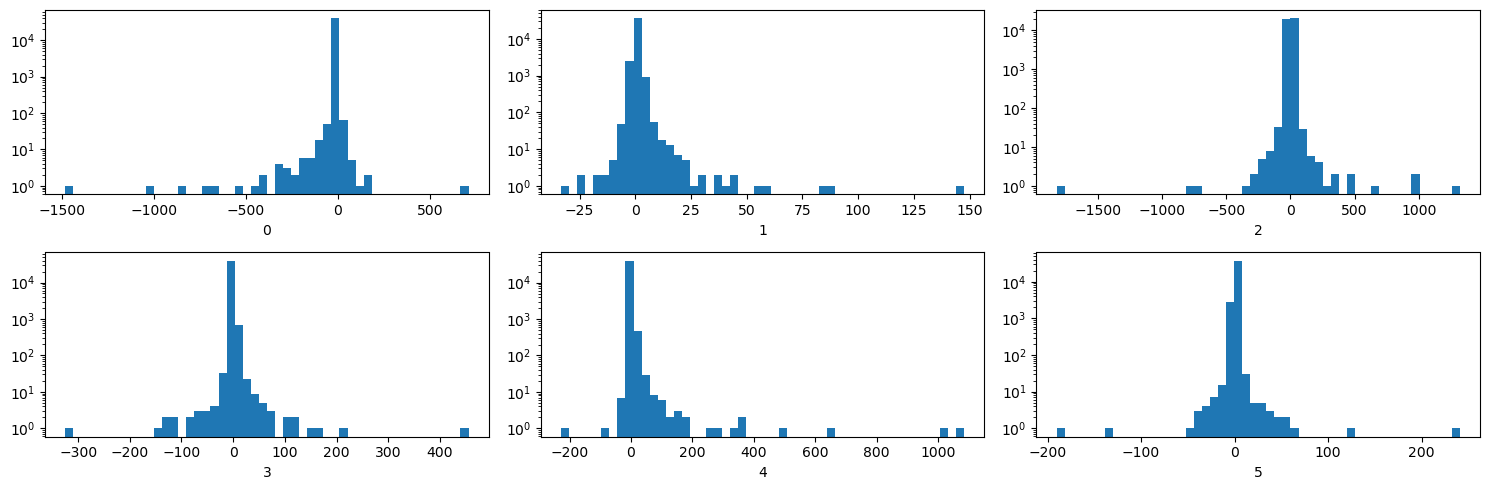

In [68]:
last_iteration = np.argmax(iteration)
last_it_file = files[last_iteration]
loaded= np.load(last_it_file)
print(last_it_file)
fig, axarr = plt.subplots(2, 3, figsize=(15, 5))
for i, ax in enumerate(axarr.flatten()):
    ax.hist(loaded[:, i], bins=50)
    ax.set_xlabel(f"{i}")
    ax.semilogy()
plt.tight_layout()

(10000, 65)


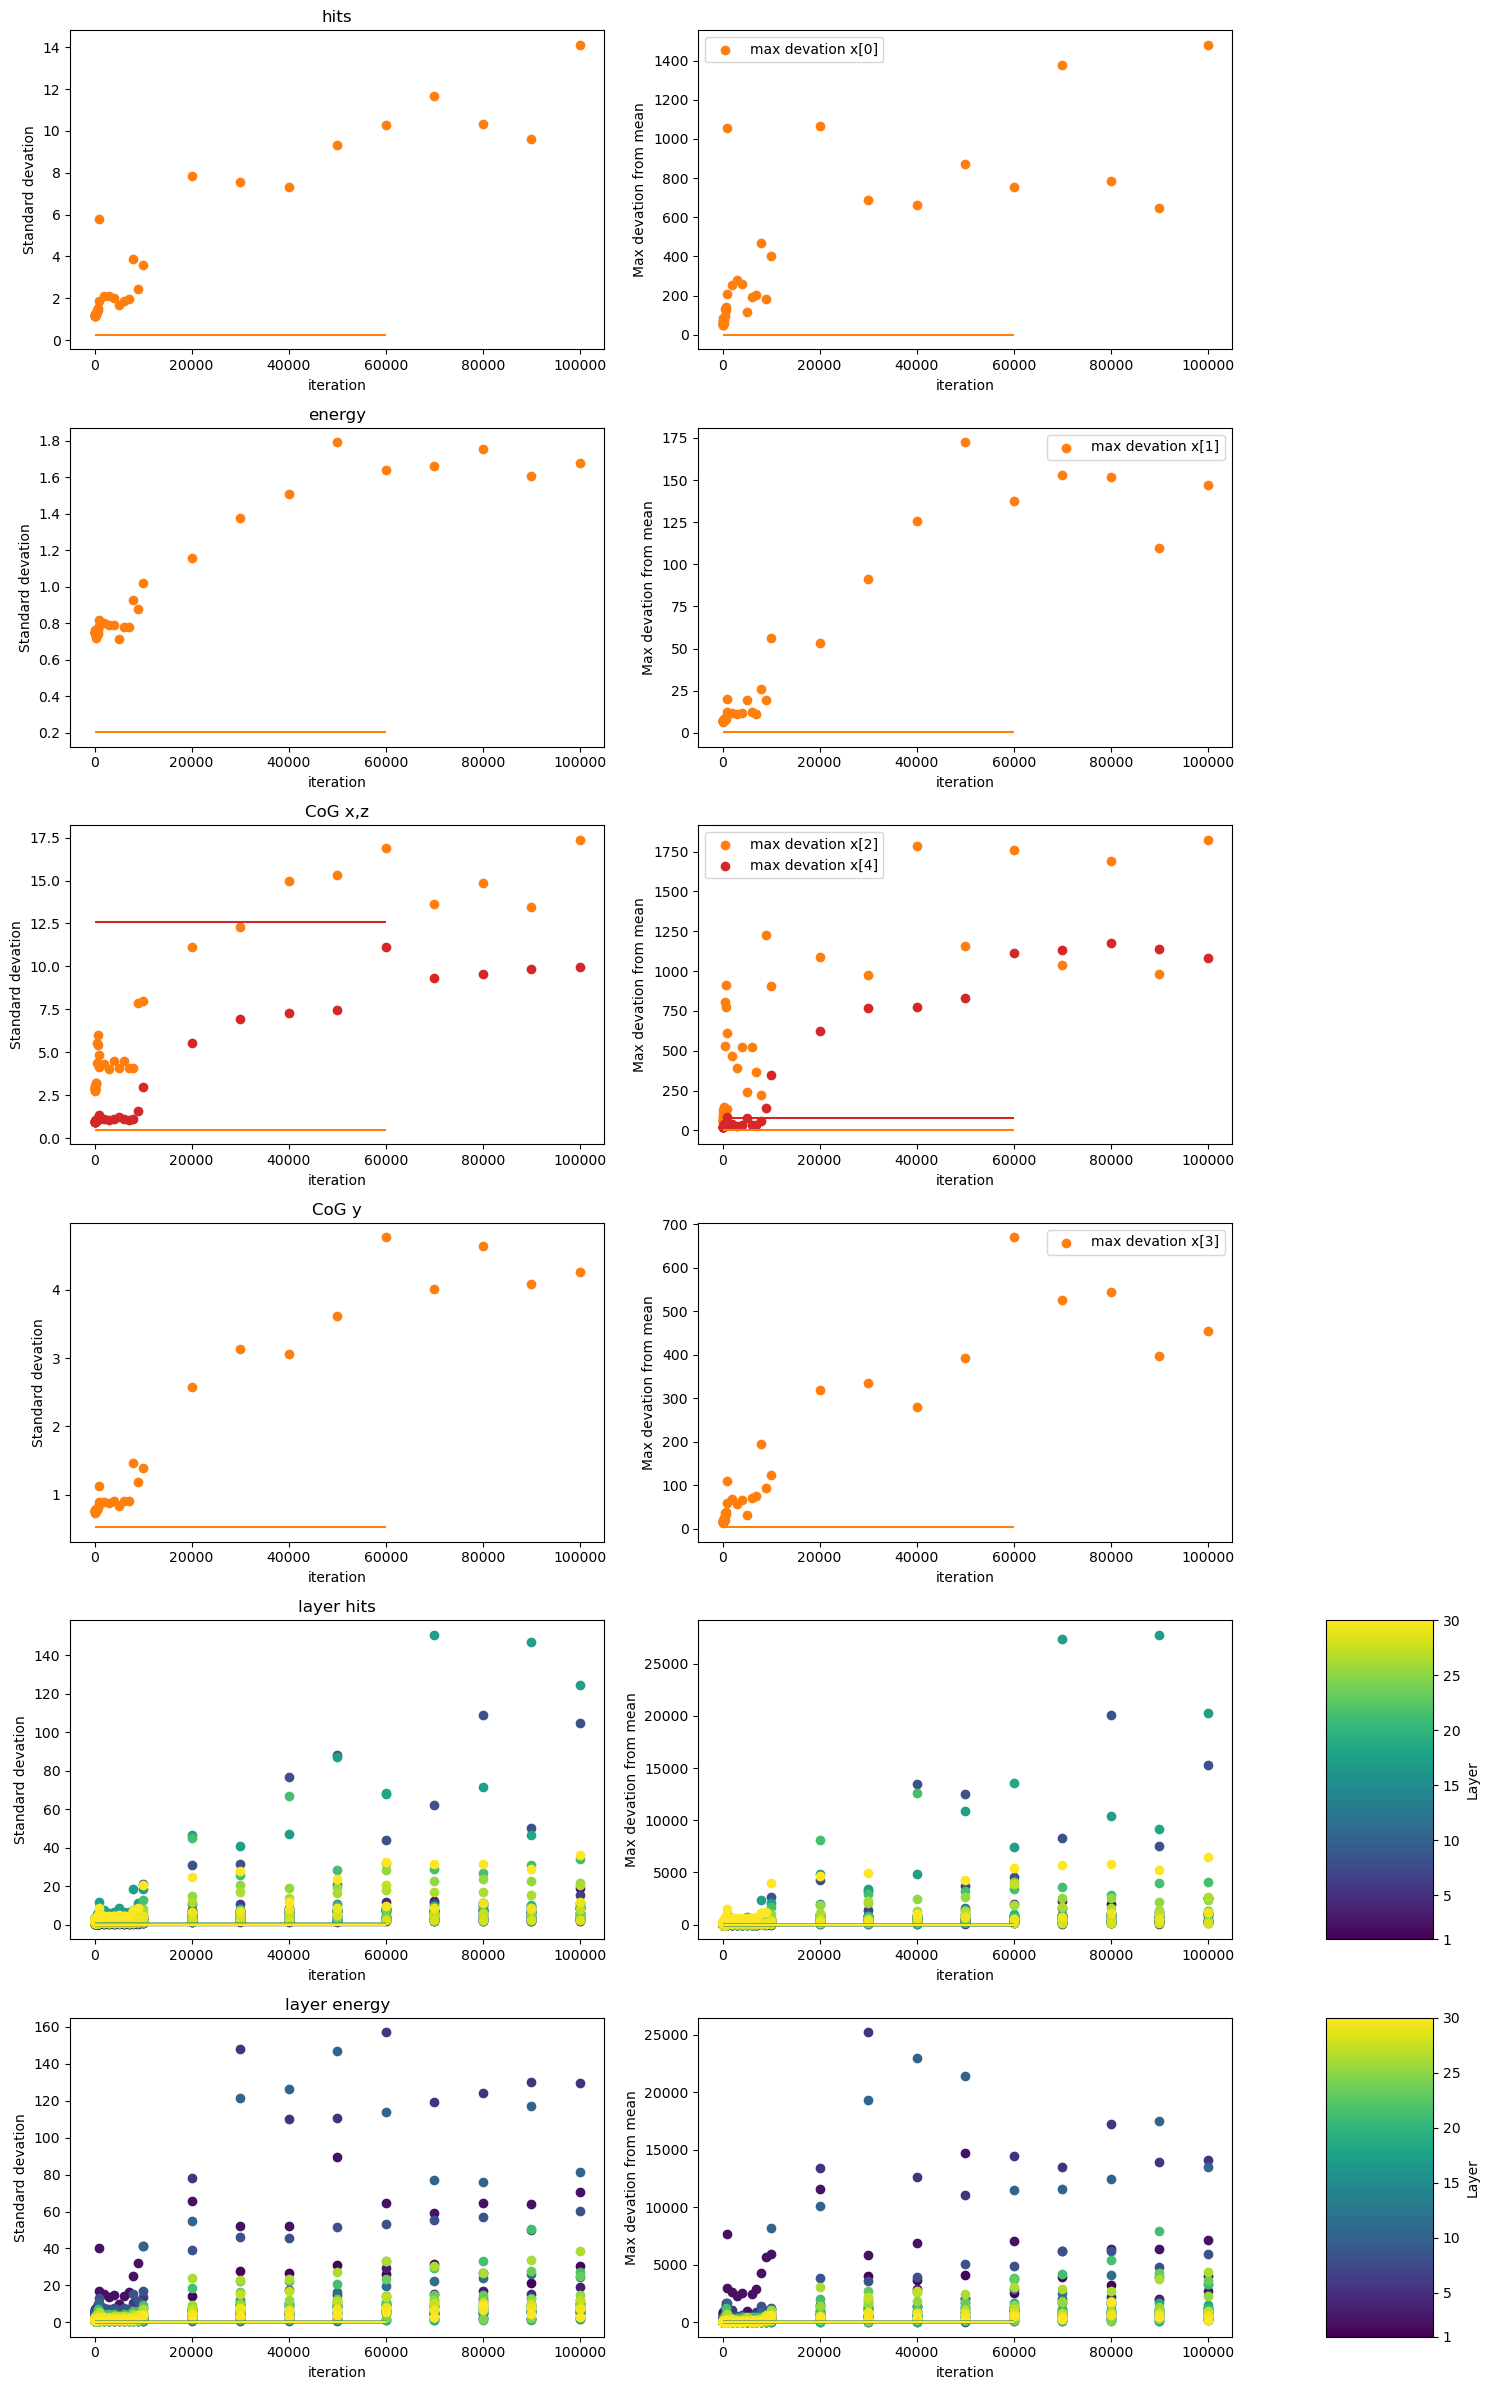

In [69]:
import os
from matplotlib import colorbar, colors
import numpy as np
from matplotlib import pyplot as plt
from pointcloud.utils.plotting import blank_axes
output_dir = "/data/dust/user/dayhallh/CC2-out/"
prefix = "pureShowerflow_highGran_g40_p22_th90_ph90_en10-100_original_nb10_inputs36893488147419103231_dhist_try2_0"
files = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if prefix in f and f.endswith("npy")]
iteration = np.fromiter((int(f.split(prefix)[-1].split('_')[0]) for f in files), dtype=int)
loaded = np.load("/data/dust/user/dayhallh/data/ILCsoftEvents/highGran_g40_p22_th90_ph90_en10-100.hdf5stack_of_training_data.npy")
print(loaded.shape)

groupings = [[0], [1], [2,4], [3], list(range(5, 35)), list(range(35, 65))]
width_ratios = [5, 5, 1]
fig, axarr = plt.subplots(len(groupings), 3, figsize=(15, 4*len(groupings)), gridspec_kw={'width_ratios':width_ratios})
grouping_names = ["hits", "energy", "CoG x,z", "CoG y", "layer hits", "layer energy"]


for g, idxs in enumerate(groupings):
    ax1, ax2, cbar_ax = axarr[g]

    if len(idxs) < 5:
        colours = plt.cm.tab10(np.linspace(0, 1, 10)+0.1)
    else:
        colours = plt.cm.viridis(np.linspace(0, 1, 30)+0.01)

    for i in idxs:
        c = colours[i-idxs[0]]
        x = np.vstack([np.load(f)[:, i] for f in files])
        
        mean_x = np.mean(x, axis=1)
        std_x = np.std(x, axis=1)
        centered_x = x - np.mean(mean_x)
        max_x_devation = np.max(np.abs(centered_x), axis=1)
        
        ds_x = loaded[:, i]
        mean_ds_x = np.mean(ds_x)
        std_ds_x = np.std(ds_x)
        max_dev_ds_x = np.max(np.abs(ds_x - mean_ds_x))
                
        ax1.scatter(iteration, std_x, label=f'std x[{i}]', c=c)
        ax1.hlines(std_ds_x, 0, 60_000, color=c)
        
        ax2.scatter(iteration, max_x_devation, label=f'max devation x[{i}]', c=c)
        ax2.hlines(max_dev_ds_x, 0, 60_000, color=c)

    if len(idxs)< 5:
        ax2.legend()
        blank_axes(cbar_ax)
    else:
        cmap = plt.cm.get_cmap('viridis')
        norm = colors.Normalize(vmin=1, vmax=30)
        cb = colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, orientation='vertical')
        cb.set_label('Layer')
        cb.set_ticks([1, 5, 10, 15, 20, 25, 30])
    
    ax1.set_title(grouping_names[g])
    ax1.set_ylabel("Standard devation")
    ax2.set_ylabel("Max devation from mean")
    for ax in [ax1, ax2]:
        #ax.semilogy()
        ax.set_xlabel('iteration')
fig.tight_layout()

(10000, 65)


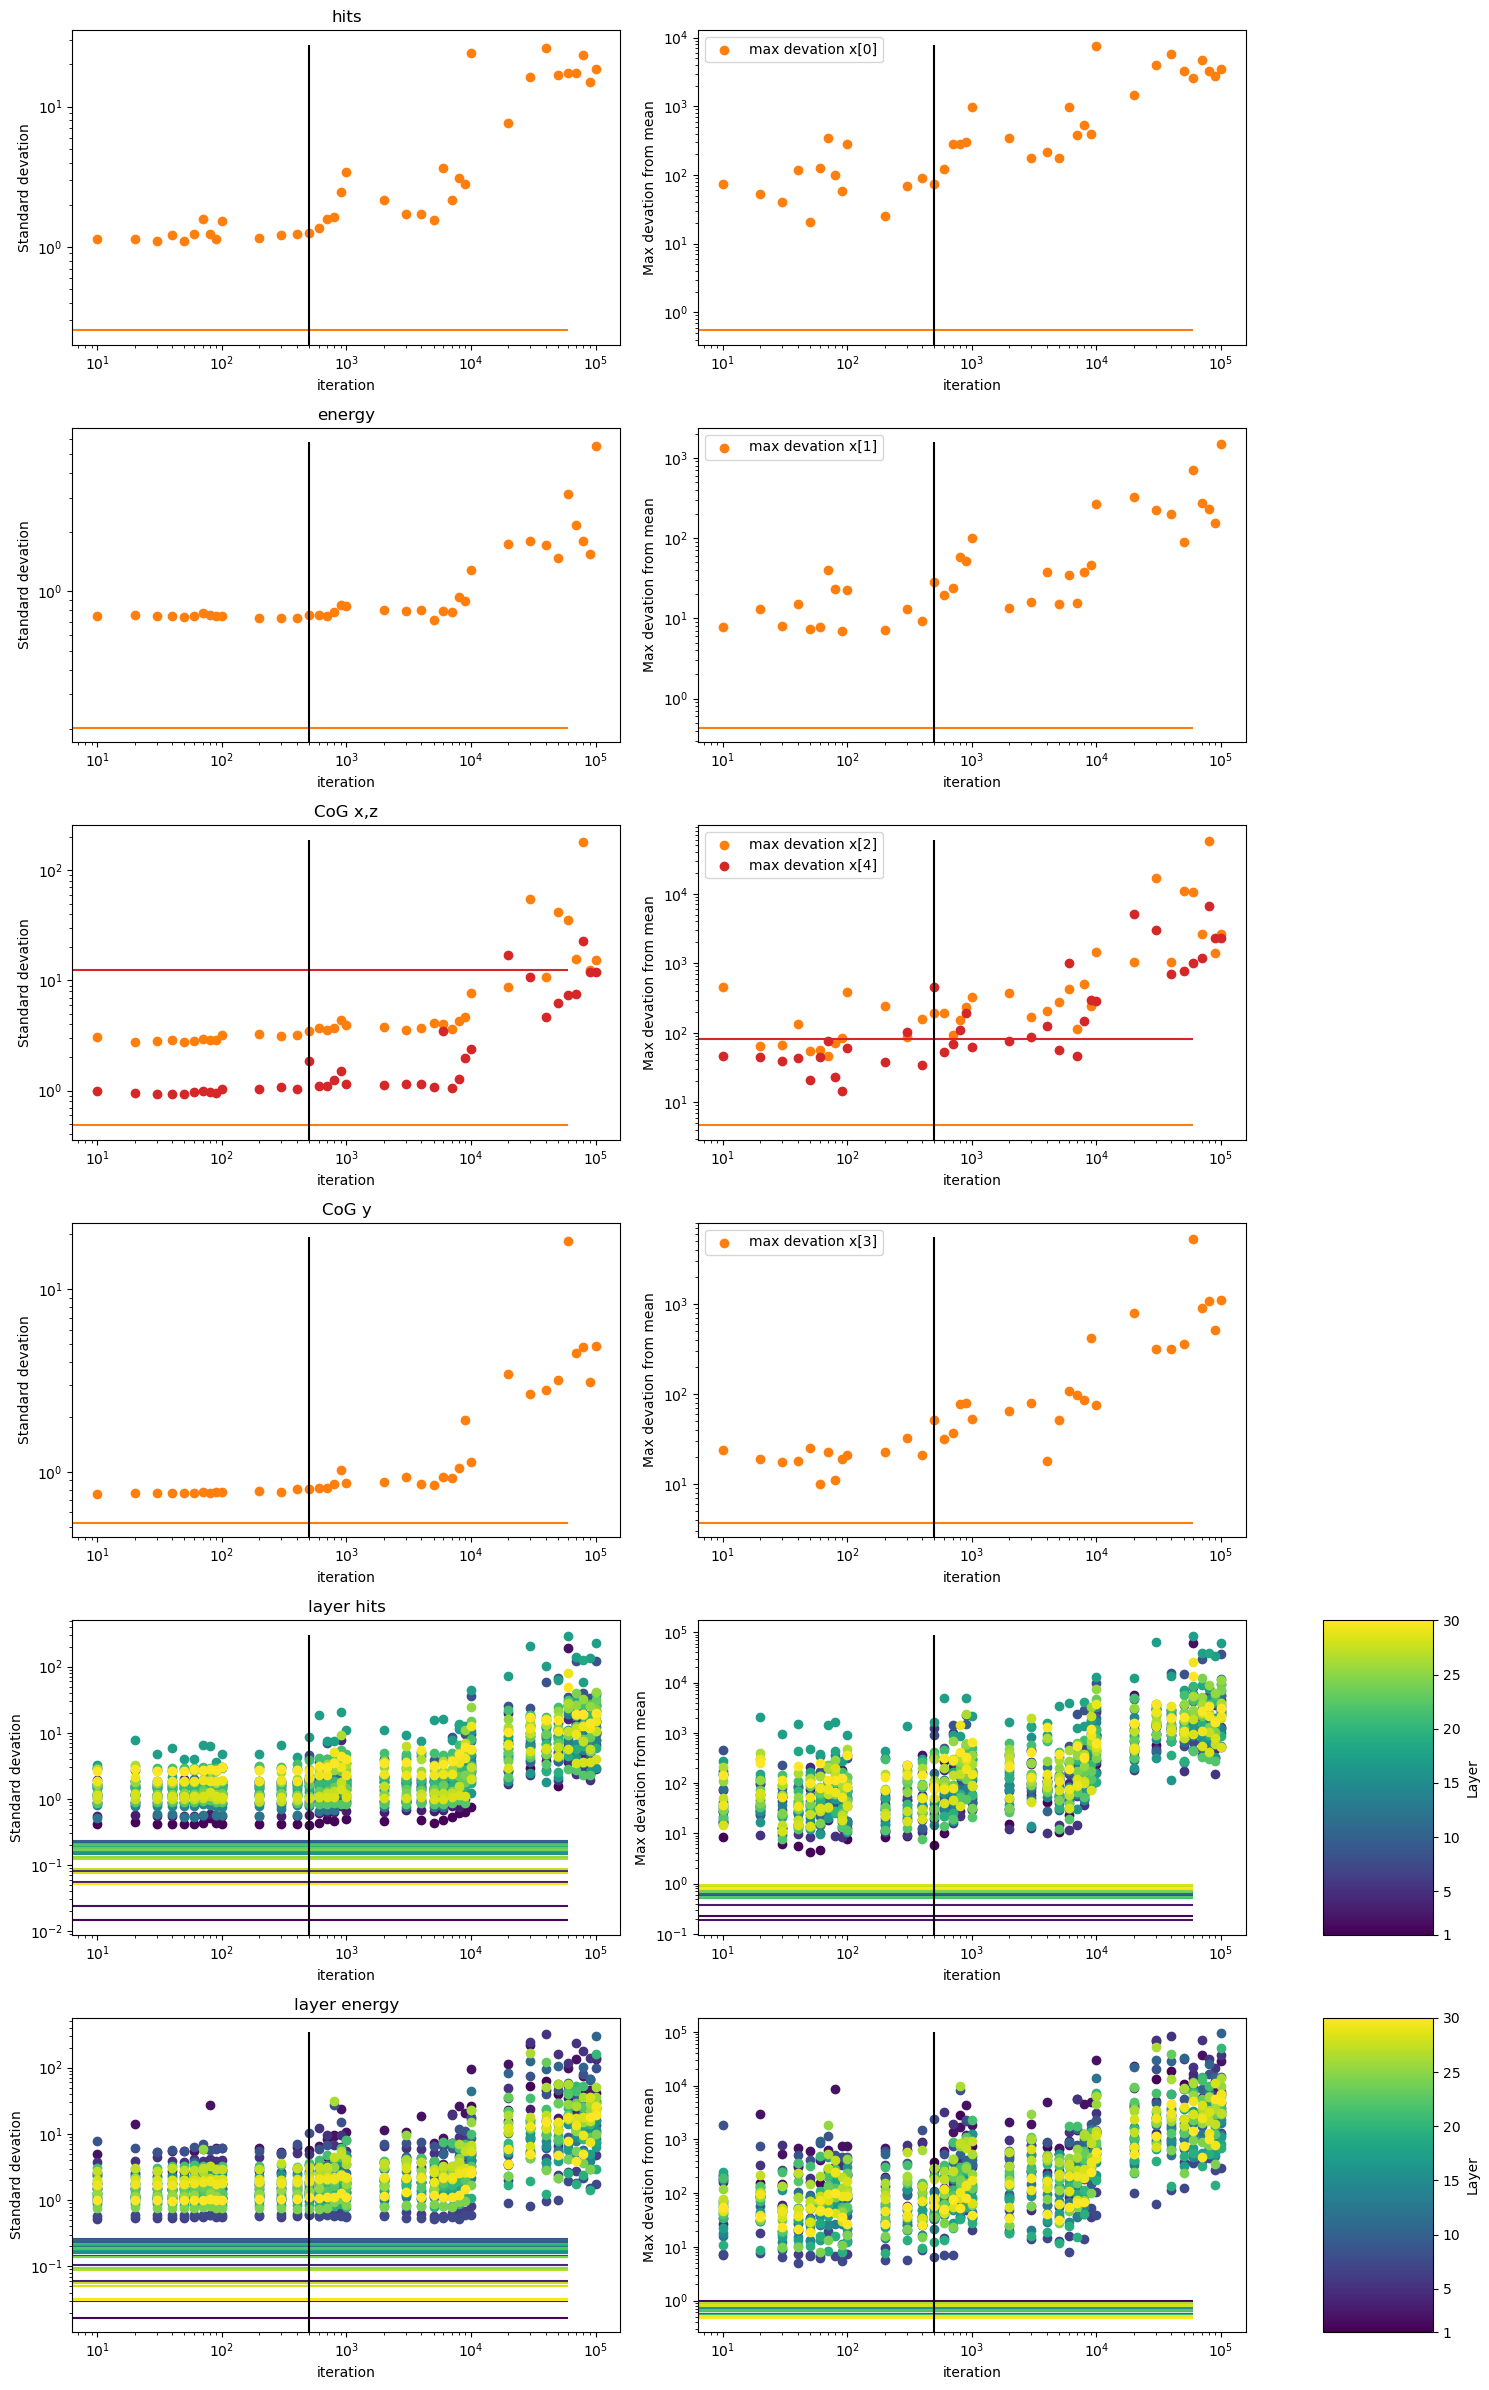

In [93]:
import os
from matplotlib import colorbar, colors
import numpy as np
from matplotlib import pyplot as plt
from pointcloud.utils.plotting import blank_axes
output_dir = "/data/dust/user/dayhallh/point-cloud-diffusion-data/showerFlow/sampling/"
prefix = "pureShowerflow_highGran_g40_p22_th90_ph90_en10-100_original_nb10_inputs36893488147419103231_dhist_try2_0"
files = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if prefix in f and f.endswith("npy")]
iteration = np.fromiter((int(f.split(prefix)[-1].split('_')[0]) for f in files), dtype=int)
loaded = np.load("/data/dust/user/dayhallh/data/ILCsoftEvents/highGran_g40_p22_th90_ph90_en10-100.hdf5stack_of_training_data.npy")
print(loaded.shape)

groupings = [[0], [1], [2,4], [3], list(range(5, 35)), list(range(35, 65))]
width_ratios = [5, 5, 1]
fig, axarr = plt.subplots(len(groupings), 3, figsize=(15, 4*len(groupings)), gridspec_kw={'width_ratios':width_ratios})
grouping_names = ["hits", "energy", "CoG x,z", "CoG y", "layer hits", "layer energy"]


for g, idxs in enumerate(groupings):
    ax1, ax2, cbar_ax = axarr[g]

    if len(idxs) < 5:
        colours = plt.cm.tab10(np.linspace(0, 1, 10)+0.1)
    else:
        colours = plt.cm.viridis(np.linspace(0, 1, 30)+0.01)

    for i in idxs:
        c = colours[i-idxs[0]]
        x = np.vstack([np.load(f)[:, i] for f in files])
        
        mean_x = np.mean(x, axis=1)
        std_x = np.std(x, axis=1)
        centered_x = x - np.mean(mean_x)
        max_x_devation = np.max(np.abs(centered_x), axis=1)
        
        ds_x = loaded[:, i]
        mean_ds_x = np.mean(ds_x)
        std_ds_x = np.std(ds_x)
        max_dev_ds_x = np.max(np.abs(ds_x - mean_ds_x))
                
        ax1.scatter(iteration, std_x, label=f'std x[{i}]', c=c)
        ax1.hlines(std_ds_x, 0, 60_000, color=c)
        
        ax2.scatter(iteration, max_x_devation, label=f'max devation x[{i}]', c=c)
        ax2.hlines(max_dev_ds_x, 0, 60_000, color=c)

    if len(idxs)< 5:
        ax2.legend()
        blank_axes(cbar_ax)
    else:
        cmap = plt.cm.get_cmap('viridis')
        norm = colors.Normalize(vmin=1, vmax=30)
        cb = colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, orientation='vertical')
        cb.set_label('Layer')
        cb.set_ticks([1, 5, 10, 15, 20, 25, 30])
    
    ax1.set_title(grouping_names[g])
    ax1.set_ylabel("Standard devation")
    ax2.set_ylabel("Max devation from mean")
    for ax in [ax1, ax2]:
        min_val, max_val = ax.get_ylim()
        ax.vlines(500, min_val, max_val, color='k')
        ax.loglog()
        ax.set_xlabel('iteration')
fig.tight_layout()

/data/dust/user/dayhallh/point-cloud-diffusion-data/showerFlow/sampling/pureShowerflow_highGran_g40_p22_th90_ph90_en10-100_original_nb10_inputs36893488147419103231_dhist_try2_0100000_2025-06-26_13-38.npy


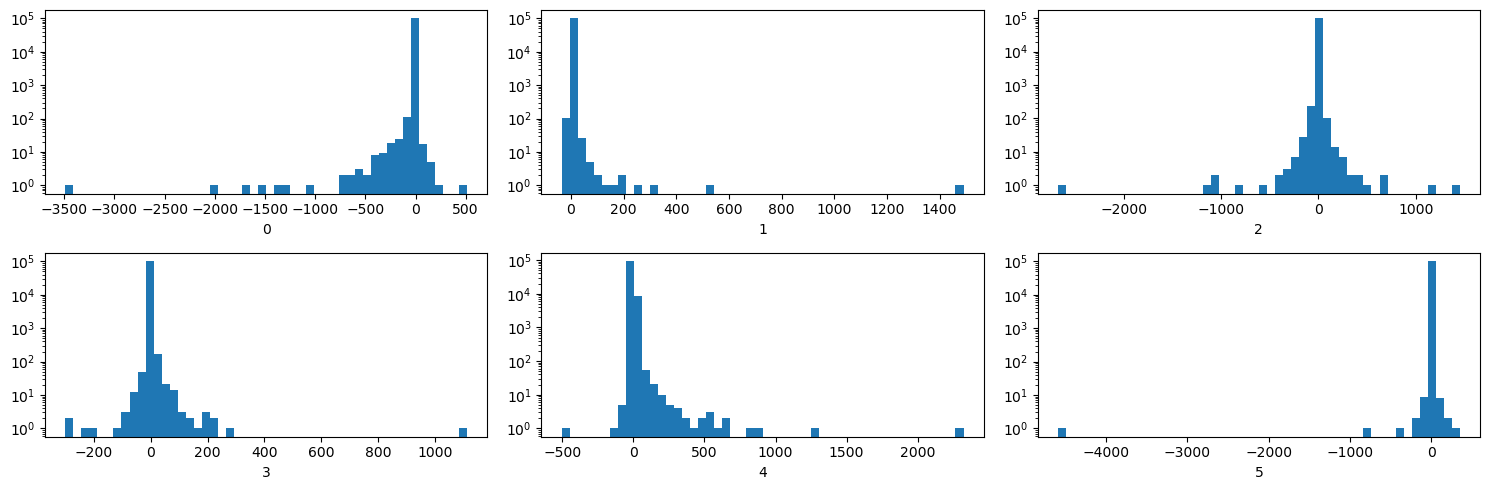

In [71]:
last_iteration = np.argmax(iteration)
last_it_file = files[last_iteration]
loaded= np.load(last_it_file)
print(last_it_file)
fig, axarr = plt.subplots(2, 3, figsize=(15, 5))
for i, ax in enumerate(axarr.flatten()):
    ax.hist(loaded[:, i], bins=50)
    ax.set_xlabel(f"{i}")
    ax.semilogy()
plt.tight_layout()

(1000000, 62)


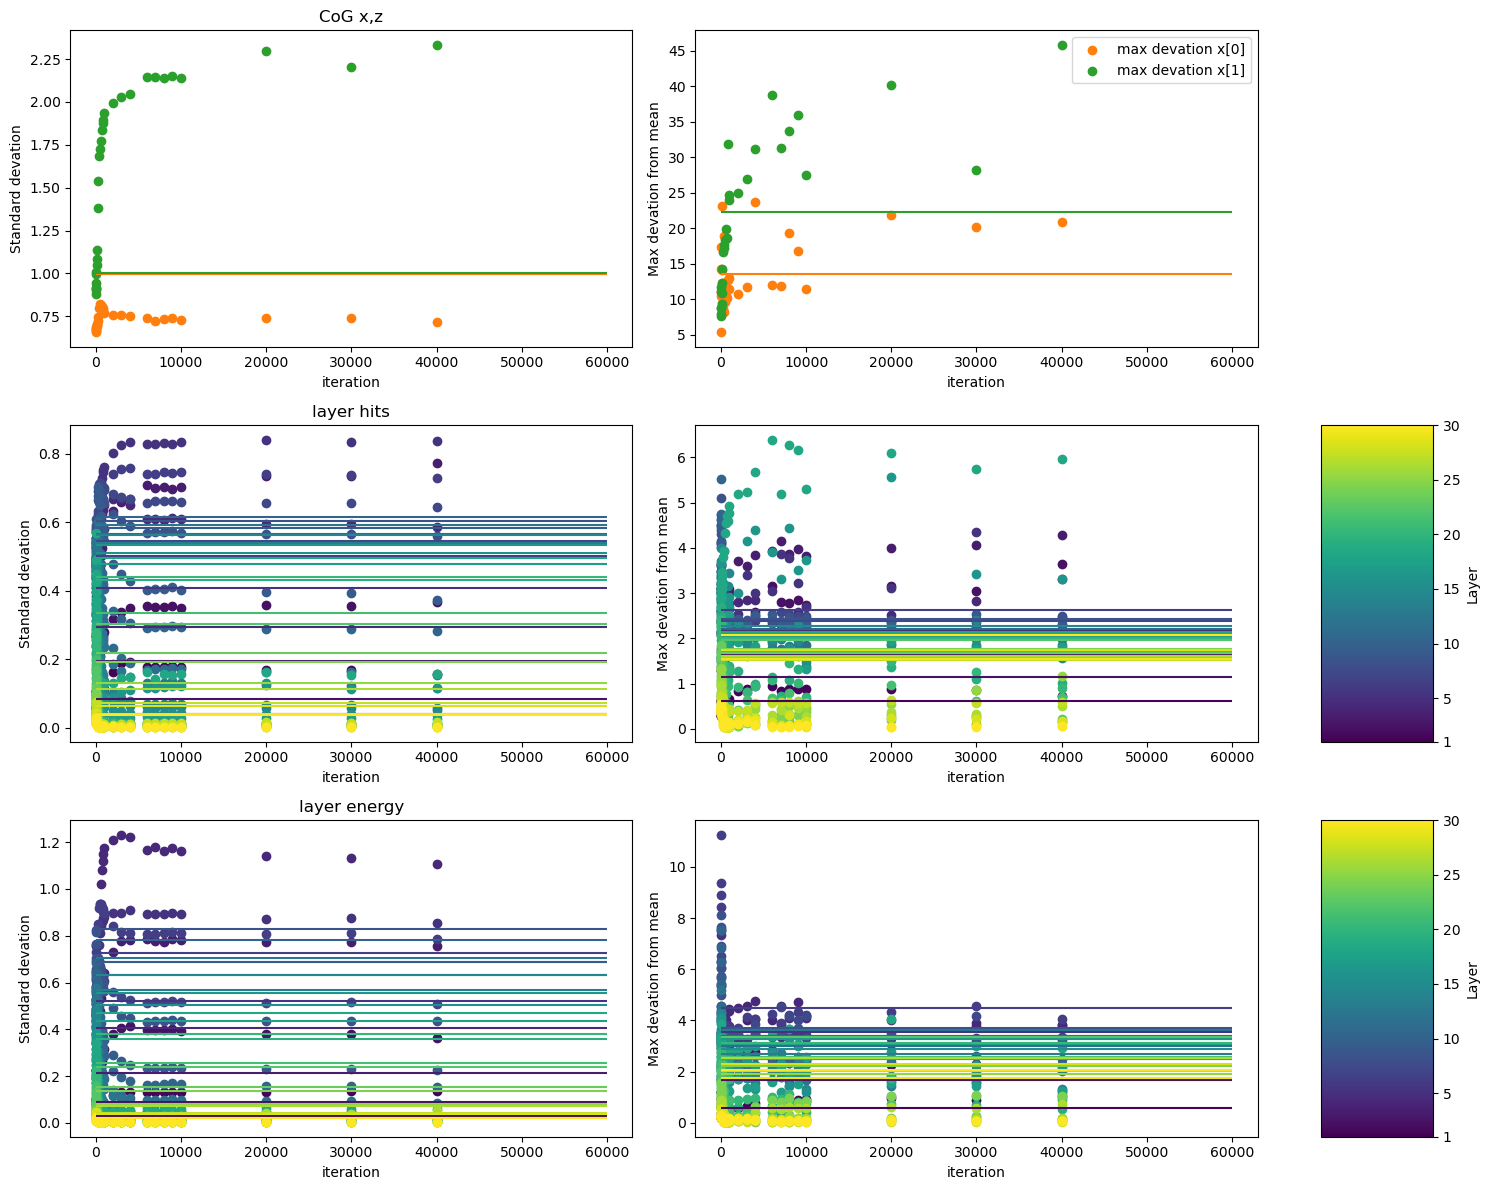

In [72]:
import os
from matplotlib import colorbar, colors
import numpy as np
from matplotlib import pyplot as plt
from pointcloud.utils.plotting import blank_axes
output_dir = "/data/dust/user/dayhallh/point-cloud-diffusion-data/showerFlow/sampling/"
prefix = "pureShowerflow_sim-E1261AT600AP180-180_alt1_nb2_inputs8070450532247928831_fnorms_dhist_try2_00"
files = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if prefix in f and f.endswith("npy")]
iteration = np.fromiter((int(f.split(prefix)[-1].split('_')[0]) for f in files), dtype=int)
loaded = np.load("/data/dust/group/ilc/sft-ml/datasets/sim-E1261AT600AP180-180/sim-E1261AT600AP180-180_file_stack_of_training_data.slcio.hdf5.npy")
print(loaded.shape)

groupings = [[0, 1], list(range(2, 32)), list(range(32, 62))]
width_ratios = [5, 5, 1]
fig, axarr = plt.subplots(len(groupings), 3, figsize=(15, 4*len(groupings)), gridspec_kw={'width_ratios':width_ratios})
grouping_names = ["CoG x,z", "layer hits", "layer energy"]


for g, idxs in enumerate(groupings):
    ax1, ax2, cbar_ax = axarr[g]

    if len(idxs) < 5:
        colours = plt.cm.tab10(np.linspace(0, 1, 10)+0.1)
    else:
        colours = plt.cm.viridis(np.linspace(0, 1, 30)+0.01)

    for i in idxs:
        c = colours[i-idxs[0]]
        x = np.vstack([np.load(f)[:, i] for f in files])
        
        mean_x = np.mean(x, axis=1)
        std_x = np.std(x, axis=1)
        centered_x = x - np.mean(mean_x)
        max_x_devation = np.max(np.abs(centered_x), axis=1)
        
        ds_x = loaded[:, i]
        mean_ds_x = np.mean(ds_x)
        std_ds_x = np.std(ds_x)
        max_dev_ds_x = np.max(np.abs(ds_x - mean_ds_x))
                
        ax1.scatter(iteration, std_x, label=f'std x[{i}]', c=c)
        ax1.hlines(std_ds_x, 0, 60_000, color=c)
        
        ax2.scatter(iteration, max_x_devation, label=f'max devation x[{i}]', c=c)
        ax2.hlines(max_dev_ds_x, 0, 60_000, color=c)

    if len(idxs)< 5:
        ax2.legend()
        blank_axes(cbar_ax)
    else:
        cmap = plt.cm.get_cmap('viridis')
        norm = colors.Normalize(vmin=1, vmax=30)
        cb = colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, orientation='vertical')
        cb.set_label('Layer')
        cb.set_ticks([1, 5, 10, 15, 20, 25, 30])
    
    ax1.set_title(grouping_names[g])
    ax1.set_ylabel("Standard devation")
    ax2.set_ylabel("Max devation from mean")
    for ax in [ax1, ax2]:
        #ax.semilogy()
        ax.set_xlabel('iteration')
fig.tight_layout()

(1000000, 62)


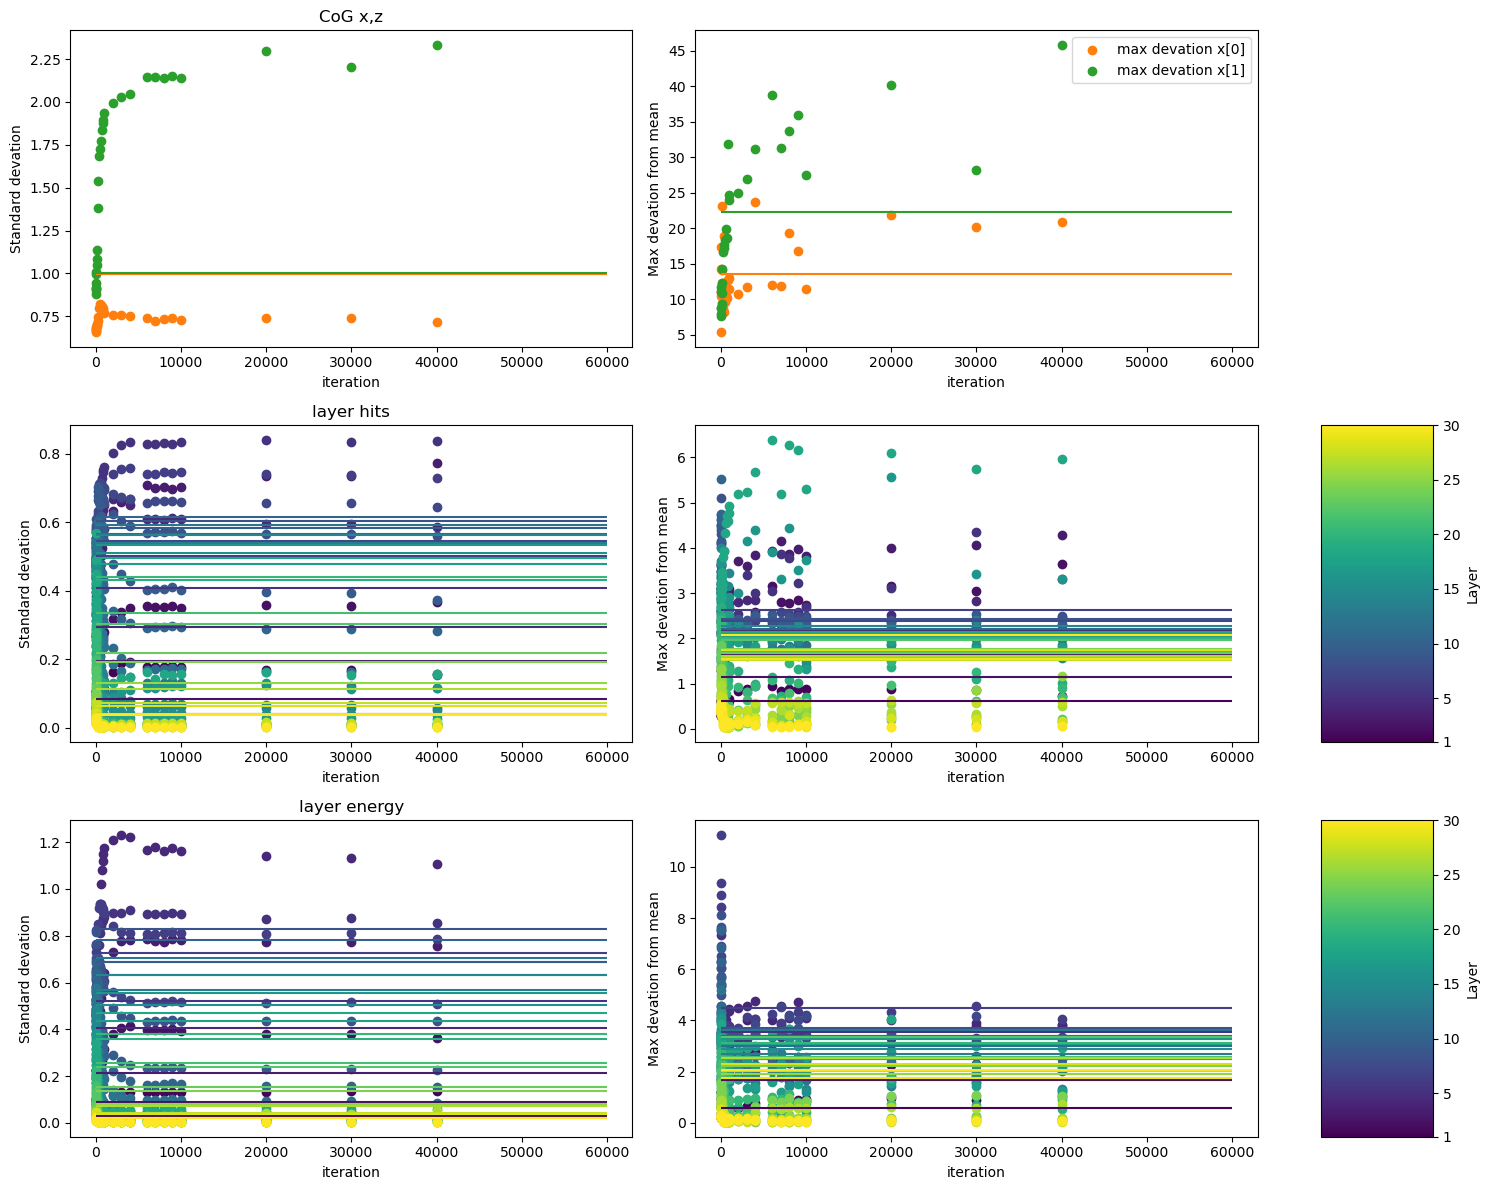

In [72]:
import os
from matplotlib import colorbar, colors
import numpy as np
from matplotlib import pyplot as plt
from pointcloud.utils.plotting import blank_axes
output_dir = "/data/dust/user/dayhallh/point-cloud-diffusion-data/showerFlow/sampling/"
prefix = "pureShowerflow_sim-E1261AT600AP180-180_alt1_nb2_inputs8070450532247928831_fnorms_dhist_try2_00"
files = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if prefix in f and f.endswith("npy")]
iteration = np.fromiter((int(f.split(prefix)[-1].split('_')[0]) for f in files), dtype=int)
loaded = np.load("/data/dust/group/ilc/sft-ml/datasets/sim-E1261AT600AP180-180/sim-E1261AT600AP180-180_file_stack_of_training_data.slcio.hdf5.npy")
print(loaded.shape)

groupings = [[0, 1], list(range(2, 32)), list(range(32, 62))]
width_ratios = [5, 5, 1]
fig, axarr = plt.subplots(len(groupings), 3, figsize=(15, 4*len(groupings)), gridspec_kw={'width_ratios':width_ratios})
grouping_names = ["CoG x,z", "layer hits", "layer energy"]


for g, idxs in enumerate(groupings):
    ax1, ax2, cbar_ax = axarr[g]

    if len(idxs) < 5:
        colours = plt.cm.tab10(np.linspace(0, 1, 10)+0.1)
    else:
        colours = plt.cm.viridis(np.linspace(0, 1, 30)+0.01)

    for i in idxs:
        c = colours[i-idxs[0]]
        x = np.vstack([np.load(f)[:, i] for f in files])
        
        mean_x = np.mean(x, axis=1)
        std_x = np.std(x, axis=1)
        centered_x = x - np.mean(mean_x)
        max_x_devation = np.max(np.abs(centered_x), axis=1)
        
        ds_x = loaded[:, i]
        mean_ds_x = np.mean(ds_x)
        std_ds_x = np.std(ds_x)
        max_dev_ds_x = np.max(np.abs(ds_x - mean_ds_x))
                
        ax1.scatter(iteration, std_x, label=f'std x[{i}]', c=c)
        ax1.hlines(std_ds_x, 0, 60_000, color=c)
        
        ax2.scatter(iteration, max_x_devation, label=f'max devation x[{i}]', c=c)
        ax2.hlines(max_dev_ds_x, 0, 60_000, color=c)

    if len(idxs)< 5:
        ax2.legend()
        blank_axes(cbar_ax)
    else:
        cmap = plt.cm.get_cmap('viridis')
        norm = colors.Normalize(vmin=1, vmax=30)
        cb = colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, orientation='vertical')
        cb.set_label('Layer')
        cb.set_ticks([1, 5, 10, 15, 20, 25, 30])
    
    ax1.set_title(grouping_names[g])
    ax1.set_ylabel("Standard devation")
    ax2.set_ylabel("Max devation from mean")
    for ax in [ax1, ax2]:
        #ax.semilogy()
        ax.set_xlabel('iteration')
fig.tight_layout()

(1000000, 62)


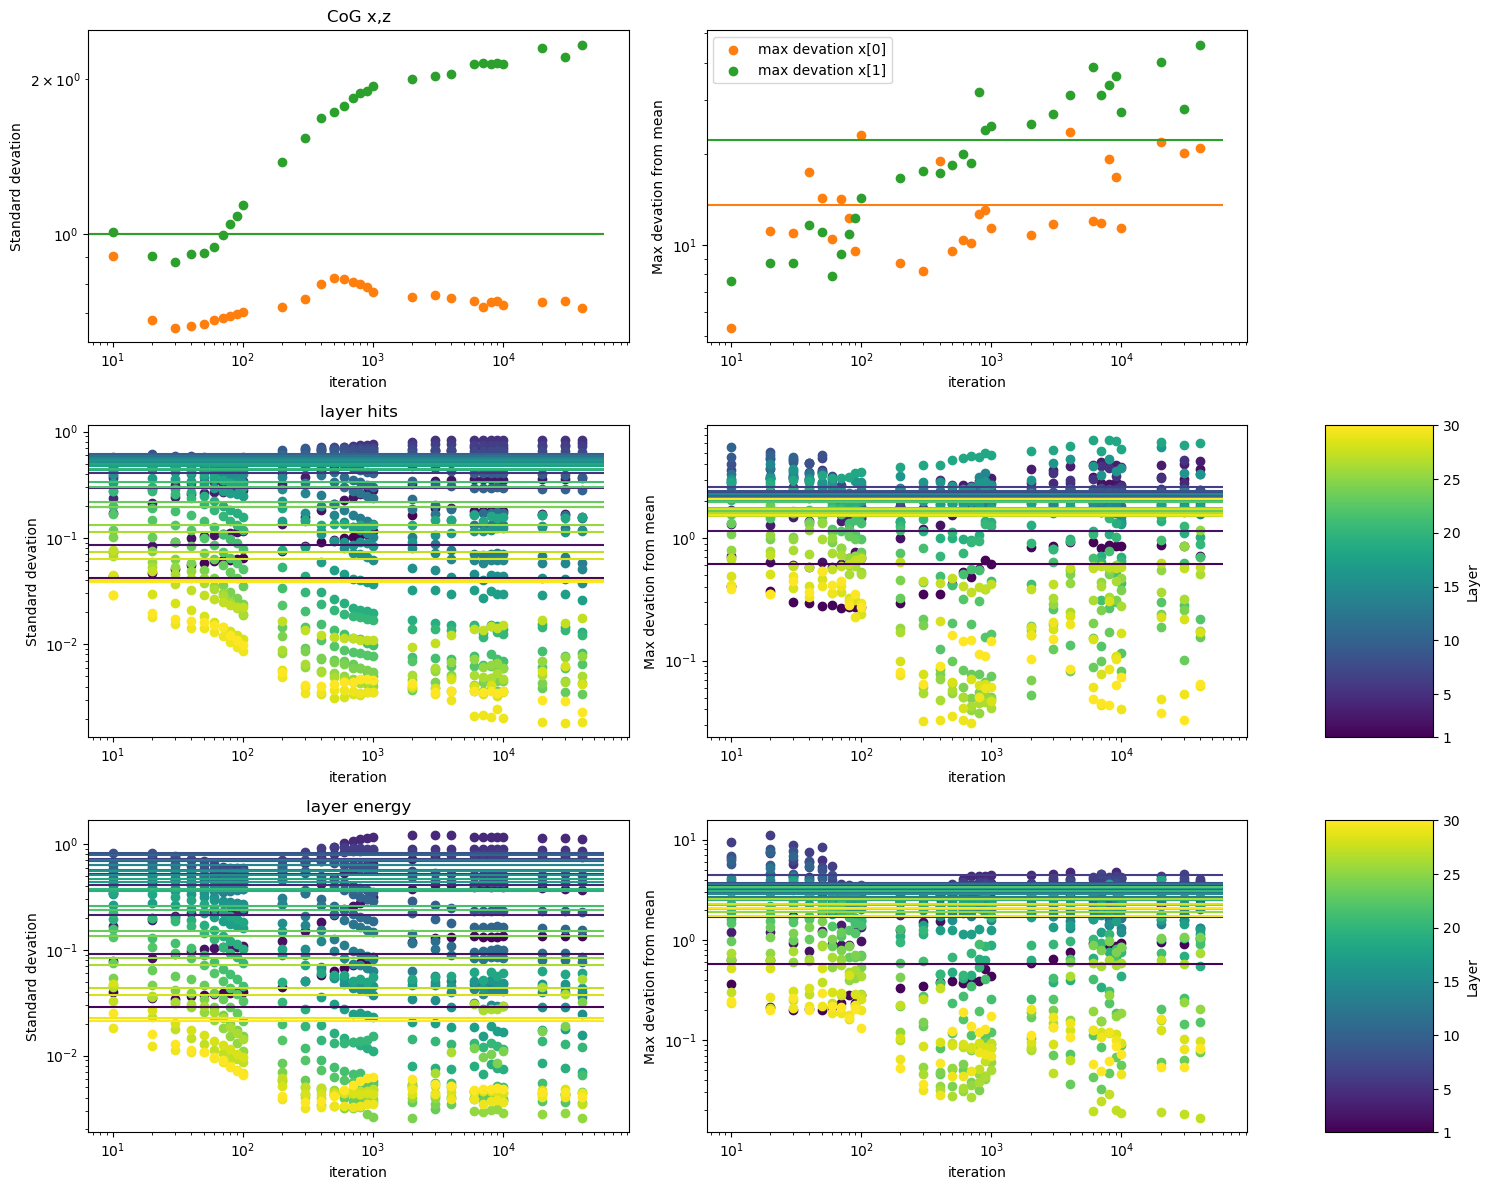

In [79]:
import os
from matplotlib import colorbar, colors
import numpy as np
from matplotlib import pyplot as plt
from pointcloud.utils.plotting import blank_axes
output_dir = "/data/dust/user/dayhallh/point-cloud-diffusion-data/showerFlow/sampling/"
prefix = "pureShowerflow_sim-E1261AT600AP180-180_alt1_nb2_inputs8070450532247928831_fnorms_dhist_try2_00"
files = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if prefix in f and f.endswith("npy")]
iteration = np.fromiter((int(f.split(prefix)[-1].split('_')[0]) for f in files), dtype=int)
loaded = np.load("/data/dust/group/ilc/sft-ml/datasets/sim-E1261AT600AP180-180/sim-E1261AT600AP180-180_file_stack_of_training_data.slcio.hdf5.npy")
print(loaded.shape)

groupings = [[0, 1], list(range(2, 32)), list(range(32, 62))]
width_ratios = [5, 5, 1]
fig, axarr = plt.subplots(len(groupings), 3, figsize=(15, 4*len(groupings)), gridspec_kw={'width_ratios':width_ratios})
grouping_names = ["CoG x,z", "layer hits", "layer energy"]

stds = []
devs = []
for g, idxs in enumerate(groupings):
    ax1, ax2, cbar_ax = axarr[g]

    if len(idxs) < 5:
        colours = plt.cm.tab10(np.linspace(0, 1, 10)+0.1)
    else:
        colours = plt.cm.viridis(np.linspace(0, 1, 30)+0.01)

    for i in idxs:
        c = colours[i-idxs[0]]
        x = np.vstack([np.load(f)[:, i] for f in files])
        
        mean_x = np.mean(x, axis=1)
        std_x = np.std(x, axis=1)
        centered_x = x - np.mean(mean_x)
        max_x_devation = np.max(np.abs(centered_x), axis=1)
        devs.append(max_x_devation)
        stds.append(std_x)

        
        ds_x = loaded[:, i]
        mean_ds_x = np.mean(ds_x)
        std_ds_x = np.std(ds_x)
        max_dev_ds_x = np.max(np.abs(ds_x - mean_ds_x))
                
        ax1.scatter(iteration, std_x, label=f'std x[{i}]', c=c)
        ax1.hlines(std_ds_x, 0, 60_000, color=c)
        
        ax2.scatter(iteration, max_x_devation, label=f'max devation x[{i}]', c=c)
        ax2.hlines(max_dev_ds_x, 0, 60_000, color=c)

    if len(idxs)< 5:
        ax2.legend()
        blank_axes(cbar_ax)
    else:
        cmap = plt.cm.get_cmap('viridis')
        norm = colors.Normalize(vmin=1, vmax=30)
        cb = colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, orientation='vertical')
        cb.set_label('Layer')
        cb.set_ticks([1, 5, 10, 15, 20, 25, 30])
    
    ax1.set_title(grouping_names[g])
    ax1.set_ylabel("Standard devation")
    ax2.set_ylabel("Max devation from mean")
    for ax in [ax1, ax2]:
        ax.loglog()
        ax.set_xlabel('iteration')
fig.tight_layout()

(1000000, 62)


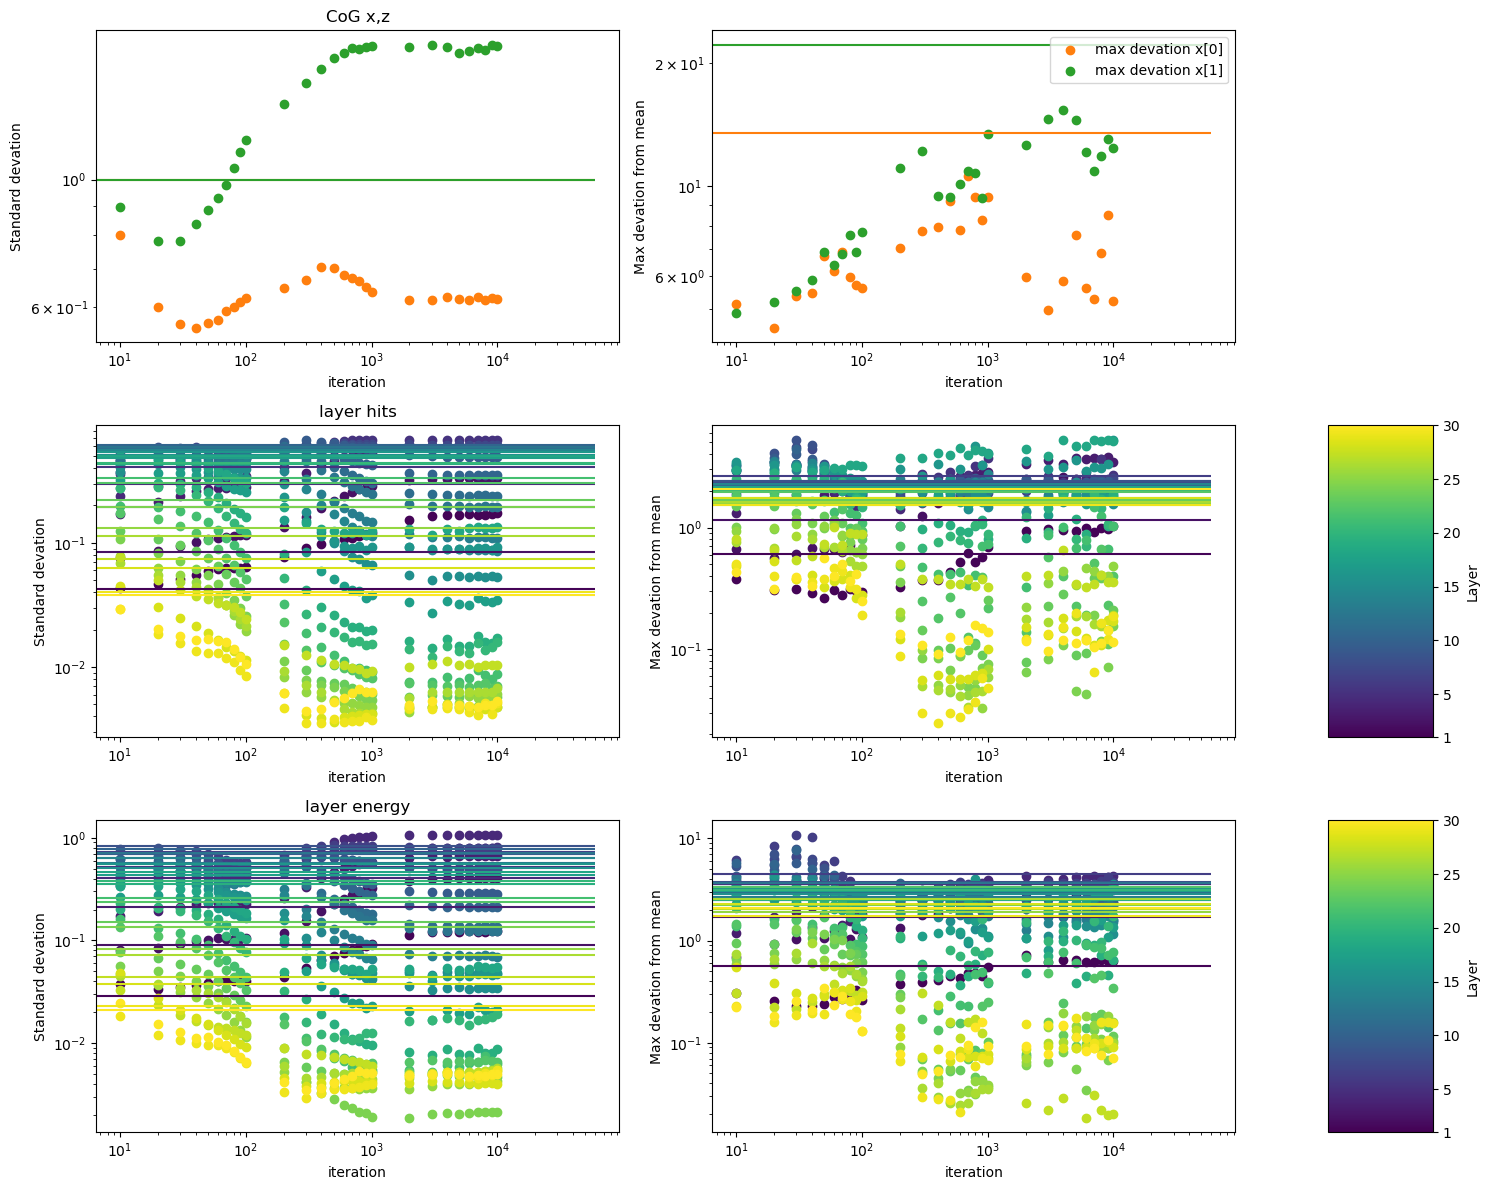

In [100]:
import os
from matplotlib import colorbar, colors
import numpy as np
from matplotlib import pyplot as plt
from pointcloud.utils.plotting import blank_axes
output_dir = "/data/dust/user/dayhallh/point-cloud-diffusion-data/showerFlow/sampling/"
prefix = "pureShowerflow_sim-E1261AT600AP180-180_alt1_nb2_inputs8070450532247928831_fnorms_dhist_try3_me10_00"
files = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if prefix in f and f.endswith("npy")]
iteration = np.fromiter((int(f.split(prefix)[-1].split('_')[0]) for f in files), dtype=int)
loaded = np.load("/data/dust/group/ilc/sft-ml/datasets/sim-E1261AT600AP180-180/sim-E1261AT600AP180-180_file_stack_of_training_data.slcio.hdf5.npy")
print(loaded.shape)

groupings = [[0, 1], list(range(2, 32)), list(range(32, 62))]
width_ratios = [5, 5, 1]
fig, axarr = plt.subplots(len(groupings), 3, figsize=(15, 4*len(groupings)), gridspec_kw={'width_ratios':width_ratios})
grouping_names = ["CoG x,z", "layer hits", "layer energy"]

stds = []
devs = []
for g, idxs in enumerate(groupings):
    ax1, ax2, cbar_ax = axarr[g]

    if len(idxs) < 5:
        colours = plt.cm.tab10(np.linspace(0, 1, 10)+0.1)
    else:
        colours = plt.cm.viridis(np.linspace(0, 1, 30)+0.01)

    for i in idxs:
        c = colours[i-idxs[0]]
        x = np.vstack([np.load(f)[:, i] for f in files])
        
        mean_x = np.mean(x, axis=1)
        std_x = np.std(x, axis=1)
        centered_x = x - np.mean(mean_x)
        max_x_devation = np.max(np.abs(centered_x), axis=1)
        devs.append(max_x_devation)
        stds.append(std_x)

        
        ds_x = loaded[:, i]
        mean_ds_x = np.mean(ds_x)
        std_ds_x = np.std(ds_x)
        max_dev_ds_x = np.max(np.abs(ds_x - mean_ds_x))
                
        ax1.scatter(iteration, std_x, label=f'std x[{i}]', c=c)
        ax1.hlines(std_ds_x, 0, 60_000, color=c)
        
        ax2.scatter(iteration, max_x_devation, label=f'max devation x[{i}]', c=c)
        ax2.hlines(max_dev_ds_x, 0, 60_000, color=c)

    if len(idxs)< 5:
        ax2.legend()
        blank_axes(cbar_ax)
    else:
        cmap = plt.cm.get_cmap('viridis')
        norm = colors.Normalize(vmin=1, vmax=30)
        cb = colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, orientation='vertical')
        cb.set_label('Layer')
        cb.set_ticks([1, 5, 10, 15, 20, 25, 30])
    
    ax1.set_title(grouping_names[g])
    ax1.set_ylabel("Standard devation")
    ax2.set_ylabel("Max devation from mean")
    for ax in [ax1, ax2]:
        ax.loglog()
        ax.set_xlabel('iteration')
fig.tight_layout()

(1000000, 62)


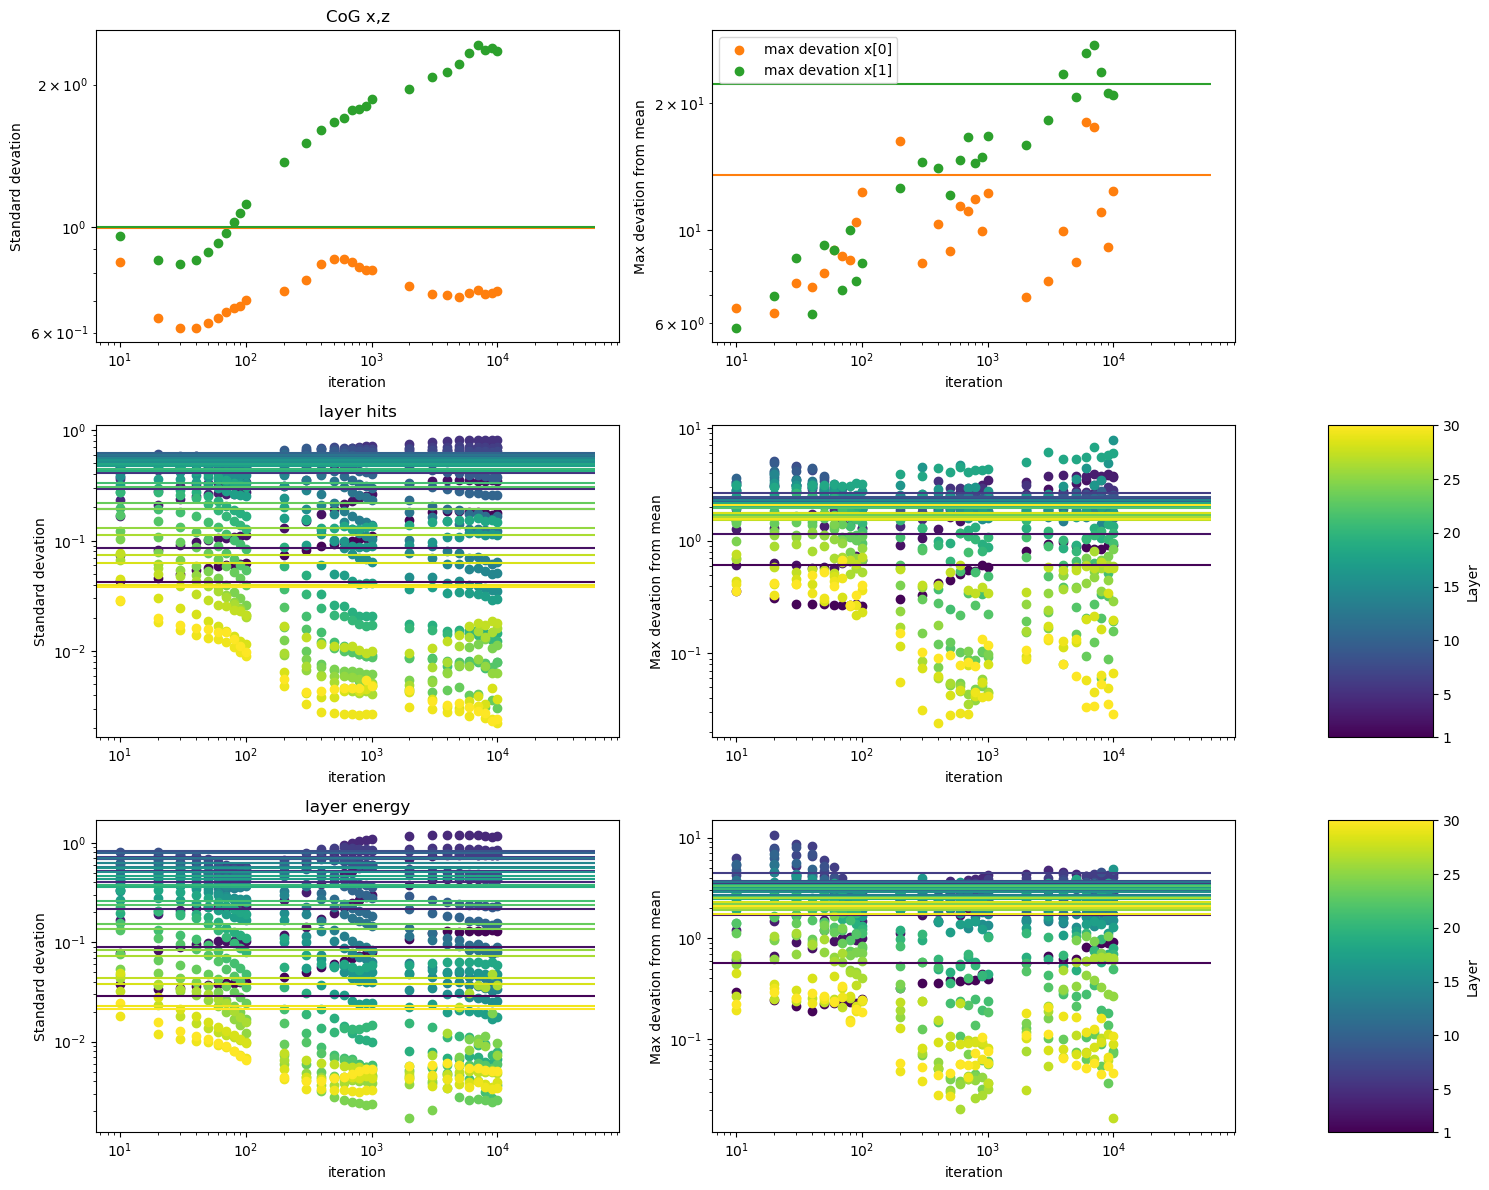

In [101]:
import os
from matplotlib import colorbar, colors
import numpy as np
from matplotlib import pyplot as plt
from pointcloud.utils.plotting import blank_axes
output_dir = "/data/dust/user/dayhallh/point-cloud-diffusion-data/showerFlow/sampling/"
prefix = "pureShowerflow_sim-E1261AT600AP180-180_alt1_nb2_inputs8070450532247928831_fnorms_dhist_try3_me3_00"
files = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if prefix in f and f.endswith("npy")]
iteration = np.fromiter((int(f.split(prefix)[-1].split('_')[0]) for f in files), dtype=int)
loaded = np.load("/data/dust/group/ilc/sft-ml/datasets/sim-E1261AT600AP180-180/sim-E1261AT600AP180-180_file_stack_of_training_data.slcio.hdf5.npy")
print(loaded.shape)

groupings = [[0, 1], list(range(2, 32)), list(range(32, 62))]
width_ratios = [5, 5, 1]
fig, axarr = plt.subplots(len(groupings), 3, figsize=(15, 4*len(groupings)), gridspec_kw={'width_ratios':width_ratios})
grouping_names = ["CoG x,z", "layer hits", "layer energy"]

stds = []
devs = []
for g, idxs in enumerate(groupings):
    ax1, ax2, cbar_ax = axarr[g]

    if len(idxs) < 5:
        colours = plt.cm.tab10(np.linspace(0, 1, 10)+0.1)
    else:
        colours = plt.cm.viridis(np.linspace(0, 1, 30)+0.01)

    for i in idxs:
        c = colours[i-idxs[0]]
        x = np.vstack([np.load(f)[:, i] for f in files])
        
        mean_x = np.mean(x, axis=1)
        std_x = np.std(x, axis=1)
        centered_x = x - np.mean(mean_x)
        max_x_devation = np.max(np.abs(centered_x), axis=1)
        devs.append(max_x_devation)
        stds.append(std_x)

        
        ds_x = loaded[:, i]
        mean_ds_x = np.mean(ds_x)
        std_ds_x = np.std(ds_x)
        max_dev_ds_x = np.max(np.abs(ds_x - mean_ds_x))
                
        ax1.scatter(iteration, std_x, label=f'std x[{i}]', c=c)
        ax1.hlines(std_ds_x, 0, 60_000, color=c)
        
        ax2.scatter(iteration, max_x_devation, label=f'max devation x[{i}]', c=c)
        ax2.hlines(max_dev_ds_x, 0, 60_000, color=c)

    if len(idxs)< 5:
        ax2.legend()
        blank_axes(cbar_ax)
    else:
        cmap = plt.cm.get_cmap('viridis')
        norm = colors.Normalize(vmin=1, vmax=30)
        cb = colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, orientation='vertical')
        cb.set_label('Layer')
        cb.set_ticks([1, 5, 10, 15, 20, 25, 30])
    
    ax1.set_title(grouping_names[g])
    ax1.set_ylabel("Standard devation")
    ax2.set_ylabel("Max devation from mean")
    for ax in [ax1, ax2]:
        ax.loglog()
        ax.set_xlabel('iteration')
fig.tight_layout()

(1000000, 62)


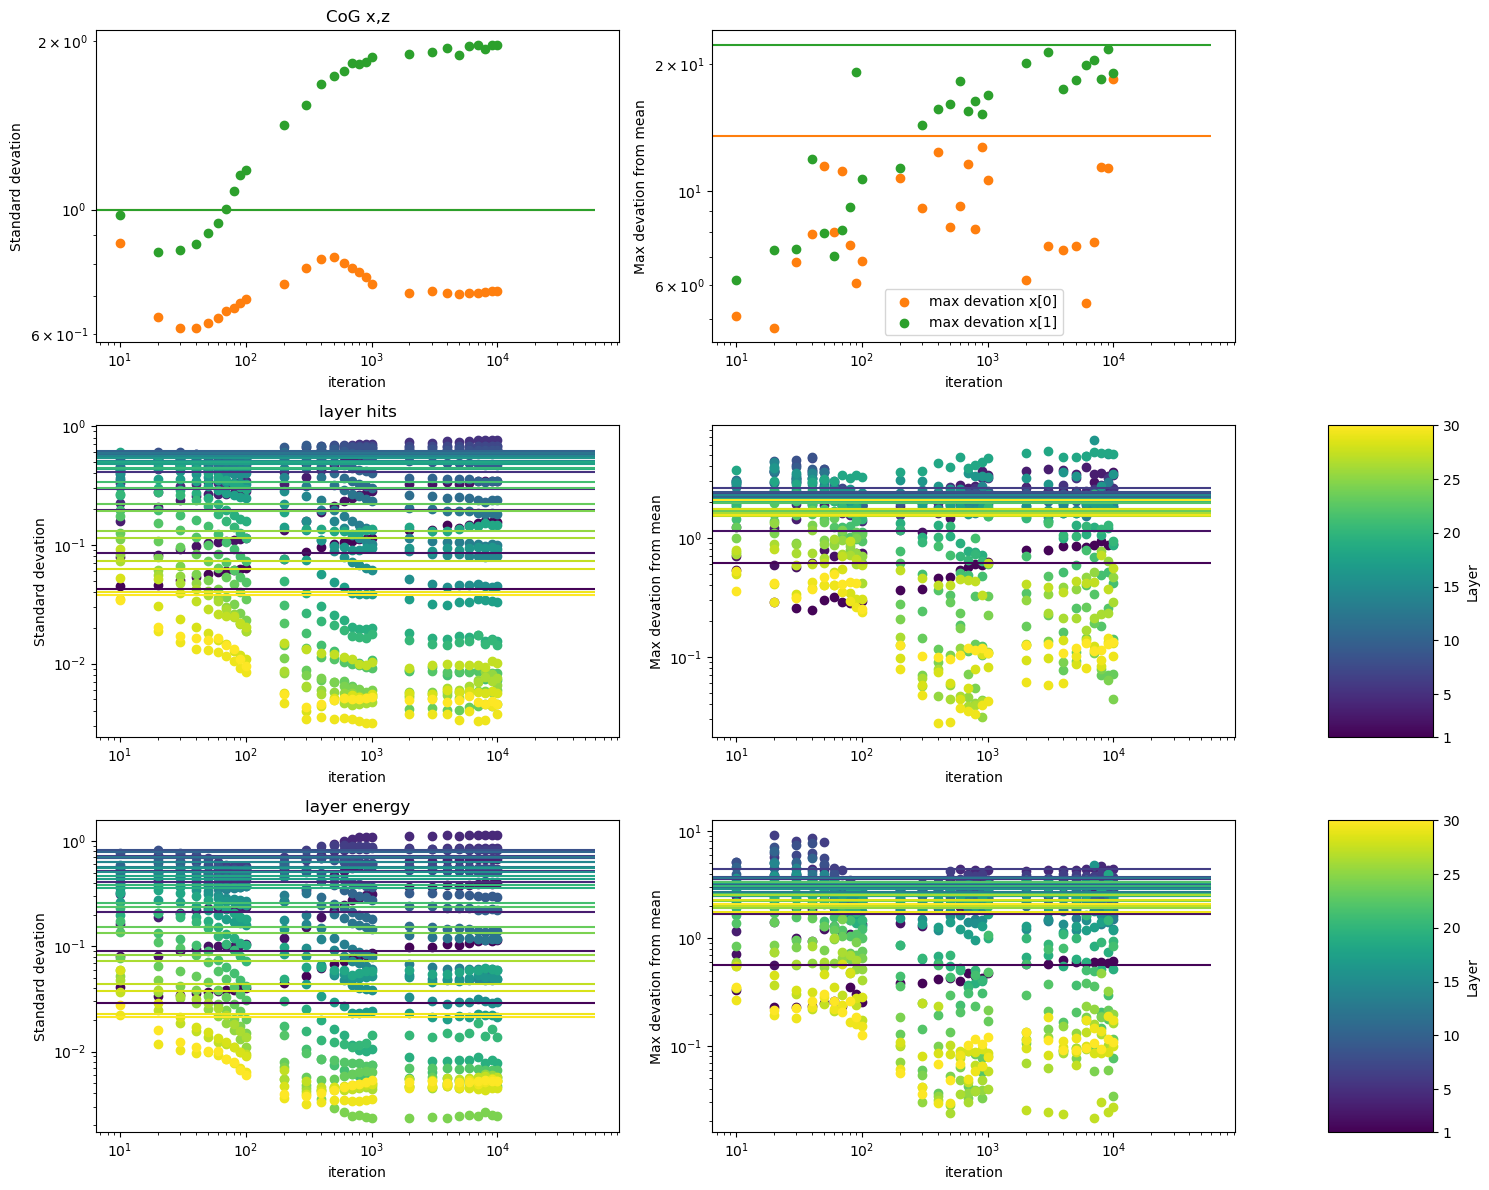

In [102]:
import os
from matplotlib import colorbar, colors
import numpy as np
from matplotlib import pyplot as plt
from pointcloud.utils.plotting import blank_axes
output_dir = "/data/dust/user/dayhallh/point-cloud-diffusion-data/showerFlow/sampling/"
prefix = "pureShowerflow_sim-E1261AT600AP180-180_alt1_nb2_inputs8070450532247928831_fnorms_dhist_try3_me4_00"
files = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if prefix in f and f.endswith("npy")]
iteration = np.fromiter((int(f.split(prefix)[-1].split('_')[0]) for f in files), dtype=int)
loaded = np.load("/data/dust/group/ilc/sft-ml/datasets/sim-E1261AT600AP180-180/sim-E1261AT600AP180-180_file_stack_of_training_data.slcio.hdf5.npy")
print(loaded.shape)

groupings = [[0, 1], list(range(2, 32)), list(range(32, 62))]
width_ratios = [5, 5, 1]
fig, axarr = plt.subplots(len(groupings), 3, figsize=(15, 4*len(groupings)), gridspec_kw={'width_ratios':width_ratios})
grouping_names = ["CoG x,z", "layer hits", "layer energy"]

stds = []
devs = []
for g, idxs in enumerate(groupings):
    ax1, ax2, cbar_ax = axarr[g]

    if len(idxs) < 5:
        colours = plt.cm.tab10(np.linspace(0, 1, 10)+0.1)
    else:
        colours = plt.cm.viridis(np.linspace(0, 1, 30)+0.01)

    for i in idxs:
        c = colours[i-idxs[0]]
        x = np.vstack([np.load(f)[:, i] for f in files])
        
        mean_x = np.mean(x, axis=1)
        std_x = np.std(x, axis=1)
        centered_x = x - np.mean(mean_x)
        max_x_devation = np.max(np.abs(centered_x), axis=1)
        devs.append(max_x_devation)
        stds.append(std_x)

        
        ds_x = loaded[:, i]
        mean_ds_x = np.mean(ds_x)
        std_ds_x = np.std(ds_x)
        max_dev_ds_x = np.max(np.abs(ds_x - mean_ds_x))
                
        ax1.scatter(iteration, std_x, label=f'std x[{i}]', c=c)
        ax1.hlines(std_ds_x, 0, 60_000, color=c)
        
        ax2.scatter(iteration, max_x_devation, label=f'max devation x[{i}]', c=c)
        ax2.hlines(max_dev_ds_x, 0, 60_000, color=c)

    if len(idxs)< 5:
        ax2.legend()
        blank_axes(cbar_ax)
    else:
        cmap = plt.cm.get_cmap('viridis')
        norm = colors.Normalize(vmin=1, vmax=30)
        cb = colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, orientation='vertical')
        cb.set_label('Layer')
        cb.set_ticks([1, 5, 10, 15, 20, 25, 30])
    
    ax1.set_title(grouping_names[g])
    ax1.set_ylabel("Standard devation")
    ax2.set_ylabel("Max devation from mean")
    for ax in [ax1, ax2]:
        ax.loglog()
        ax.set_xlabel('iteration')
fig.tight_layout()

In [74]:
x_dev = devs[0]/np.max(devs[0])
y_dev = devs[1]/np.max(devs[1])
x_stds = stds[0]/np.max(stds[0])
y_stds = stds[1]/np.max(stds[1])
objectives = x_dev, y_dev, x_stds, y_stds
choices = [np.argmin(j) for j in objectives]
choices.append(np.argmin(x_dev+y_dev+x_stds+y_stds))
choices.append(np.argmin(x_dev*y_dev*x_stds*y_stds))

for c in choices:
    print(iteration[c])
    a = np.array([o[c] for o in objectives])
    print(a, c)
    print(np.mean(a))

10
[0.2251698  0.16548522 1.         0.4312534 ] 10
0.45547712
10
[0.2251698  0.16548522 1.         0.4312534 ] 10
0.45547712
30
[0.46388003 0.1898017  0.7247165  0.3780916 ] 9
0.43912244
30
[0.46388003 0.1898017  0.7247165  0.3780916 ] 9
0.43912244
30
[0.46388003 0.1898017  0.7247165  0.3780916 ] 9
0.43912244
10
[0.2251698  0.16548522 1.         0.4312534 ] 10
0.45547712


Text(0, 0.5, 'loss')

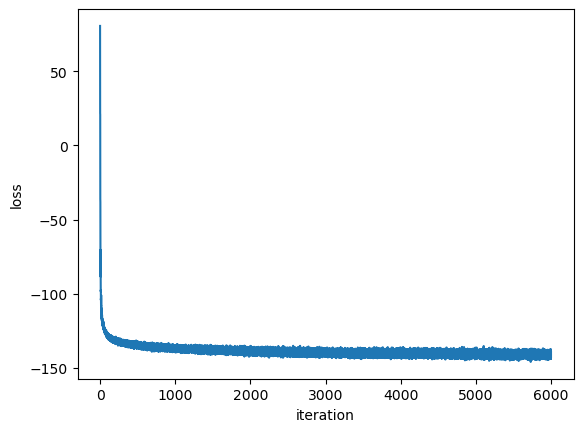

In [75]:
dhist = np.load("/data/dust/user/dayhallh/point-cloud-diffusion-data/showerFlow/sim-E1261AT600AP180-180/ShowerFlow_alt1_nb2_inputs8070450532247928831_fnorms_dhist_try2_history.npy")
iteration = dhist[0]
stop = np.where(iteration==6_000)[0][0]
plt.plot(iteration[:stop], dhist[1][:stop])
plt.xlabel('iteration')
plt.ylabel('loss')


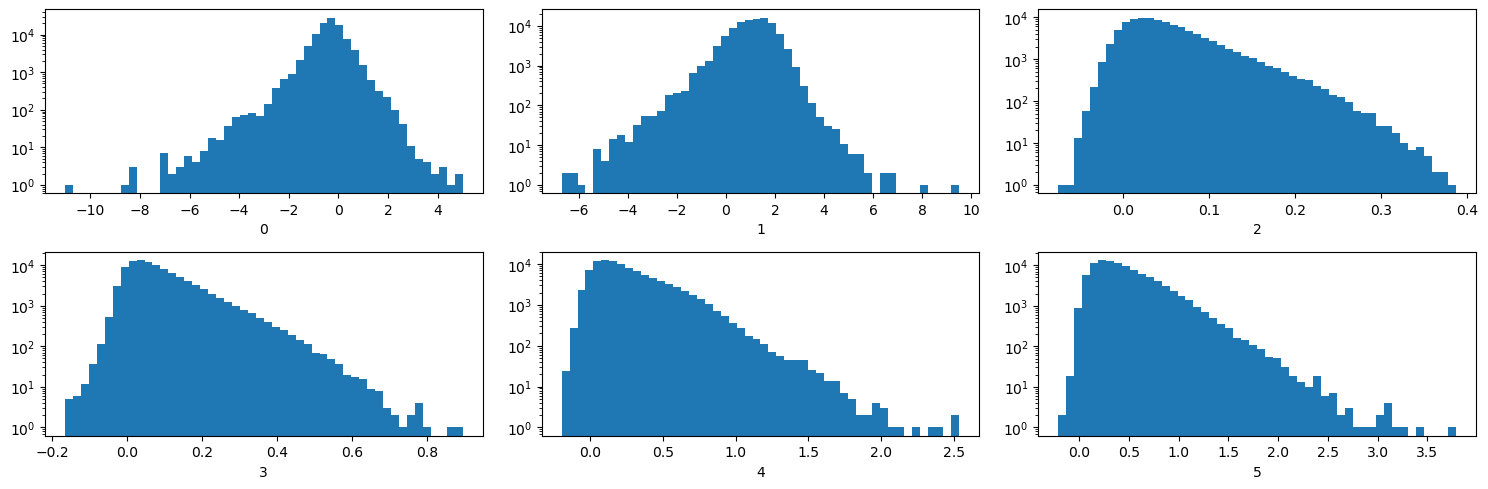

In [76]:
loaded = np.load(files[9])
fig, axarr = plt.subplots(2, 3, figsize=(15, 5))
for i, ax in enumerate(axarr.flatten()):
    ax.hist(loaded[:, i], bins=50)
    ax.set_xlabel(f"{i}")
    ax.semilogy()
plt.tight_layout()